In [ ]:
!apt install aptitude

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [ ]:
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y

git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
The following NEW packages will be installed:
  file libmagic-mgc{a} libmagic1{a} libmecab-dev libmecab2{a} mecab mecab-ipadic{a} mecab-ipadic-utf8 mecab-jumandic{a} mecab-jumandic-utf8{a} mecab-utils{a} 
0 packages upgraded, 11 newly installed, 0 to remove and 39 not upgraded.
Need to get 29.3 MB of archives. After unpacking 282 MB will be used.
Get: 1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2

In [ ]:
!pip install mecab-python3==0.7

     |████████████████████████████████| 51kB 4.9MB/s 
  Created wheel for mecab-python3: filename=mecab_python3-0.7-cp37-cp37m-linux_x86_64.whl size=156583 sha256=60090e13e0d178e7bcd4894d01268456b1beffd8f3a85a6e079dbf9f58218323
  Stored in directory: /root/.cache/pip/wheels/4c/07/3a/5f22ccc9f381f3bc01fa023202061cd1e0e9af855292f005dd
Successfully built mecab-python3


In [ ]:
import re
import MeCab
import nltk

### MeCabを使って、形態素に慣れてみる
Google Colabratory ならば、**`!mecab`**で、お試しできる。  
`すももももものうち`

In [ ]:
!mecab

すももももものうち
すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
EOS
^C


**表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音**  
出力フォーマットは上記のようになっています。  
引数にファイルを与えると, そのファイルが解析対象となります。   
また, `-o` オプションにて, 別のファイルに結果を出力することも可能です。

In [ ]:
# ユーザー認証
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!dir

adc.json  drive  sample_data


In [ ]:
!cd drive

In [ ]:
!dir

adc.json  drive  sample_data


In [ ]:
!ls -l drive

total 8
drwx------ 4 root root 4096 Jun 16 07:46 MyDrive
drwx------ 2 root root 4096 Jun 16 07:46 Shareddrives


In [ ]:
!mecab /content/drive/MyDrive/NLP_TRAINING/DATA/sample_file.txt -o /content/drive/MyDrive/sample_output.txt

**わかち書き**してみる  
`太郎はこの本を二郎をみた女性の隣にいる男性に渡した`

In [ ]:
!mecab -O wakati

太郎はこの本を二郎をみた女性の隣にいる男性に渡した
太郎 は この 本 を 二 郎 を み た 女性 の 隣 に いる 男性 に 渡し た 
^C


### 出力フォーマット  
[MeCab公式より抜粋](https://taku910.github.io/mecab/format.html)  
  
**概要**
MeCab は, ChaSen と同様, 出力のフォーマットを比較的自由に再定義することができます.   
また, 設定ファイルにフォーマットを複数記述しておき, 実行時にそれらを 切り変えることが  
可能です. これは, MeCab 独自の機能です.  
  
**出力フォーマットの指定**  
以下の 3つ出力フォーマットを変更することができます.  
  
`node`: 1つの形態素を出力, デフォルトは空文字  
`unk`: 1つの未知語形態素を出力, デフォルトは node と同一フォーマット  
`bos`: 形態素解析の結果に先だって出力 (header 的役割), デフォルトは空文字  
`eos`: 形態素解析の結果の後に出力 (footer 的役割), デフォルトは "EOS\n"  
`eon`: N-best出力で, N-Bestの出力が終了したときに出力, デフォルトは空文字列  
明示的に指定されない場合, それぞれのデフォルト文字列が使用されます.  
  
これらは, 以下の 2つの方法で指定します.  
  
コマンドラインから  
`!mecab --node-format=STR --bos-format=STR --eos-format=STR --unk-format=STR --eon-format=STR`  
mecabrc に記述する場合  
任意の文字列 KEY を使い, mecabrc に以下のように定義.  
  
`node-format-KEY = STR`  
`unk-format-KEY = STR`  
`eos-format-KEY = STR`  
`bos-format-KEY = STR`  
`eon-format-KEY = STR`  
この KEY をコマンドラインから呼び出す.    
  
% mecab -Okey   
出力フォーマット  
%s	形態素種類 (0: 通常, 1: 未知語, 2:文頭, 3:文末)  
%S	入力文  
%L	入力文の長さ  
%m	形態素の表層文字列  
%M	形態素の表層文字列, ただし空白文字も含めて出力 (%pS を参照のこと)  
%h	素性の内部 ID  
%%	% そのもの  
%c	単語生起コスト  
%H	素性 (品詞, 活用, 読み) 等を CSV で表現したもの  
%t	文字種 id  
%P	周辺確率 (-l2 オプションを指定したときのみ有効)  
%pi	形態素に付与されるユニークなID  
%pS	もし形態素が空白文字列で始まる場合は, その空白文字列を表示 %pS%m と %M は同一  
%ps	開始位置  
%pe	終了位置  
%pC	1つ前の形態素との連接コスト  
%pw	%c と同じ  
%pc	連接コスト + 単語生起コスト (文頭から累積)  
%pn	連接コスト + 単語生起コスト (その形態素単独, %pw + %pC)  
%pb	最適パスの場合 *, それ以外は ' '  
%pP	周辺確率 (-l2 オプションを指定したときのみ有効)  
%pA	blpha, forward log 確率 (-l2 オプションを指定したときのみ有効)  
%pB	beta, backward log 確率 (-l2 オプションを指定したときのみ有効)  
%pl	形態素の表層文字列としての長さ, strlen (%m) と同一  
%pL	形態素の表層文字列としての長さ, ただし空白文字列も含む, strlen(%M) と同一  
%phl	左文脈 id  
%phr	右文脈 id  
%f[N]	csv で表記された素性の N番目の要素  
%f[N1,N2,N3...]	N1,N2,N3番目の素性を, "," を デリミタとして表示  
%FC[N1,N2,N3...]	N1,N2,N3番目の素性を, C を デリミタとして表示.  
ただし, 要素が 空の場合は以降表示が省略される. (例)F-[0,1,2]  
\0 \a \b \t \n \v \f \r \\	通常の エスケープ文字列  
\s	' ' (半角スペース)  
設定ファイルに記述するときに使用  

**未知語への対応**  
`ノブデータ県ノブデータ市ノブデータ区`

In [ ]:
!mecab --unk-feature "未知語" 

ノブデータ県ノブデータ市ノブデータ区
ノブ	名詞,一般,*,*,*,*,ノブ,ノブ,ノブ
データ	名詞,一般,*,*,*,*,データ,データ,データ
県	名詞,接尾,地域,*,*,*,県,ケン,ケン
ノブデータ	未知語
市	名詞,接尾,地域,*,*,*,市,シ,シ
ノブデータ	未知語
区	名詞,接尾,地域,*,*,*,区,ク,ク
EOS
^C


**N-Best 解の出力**  
形態素解析で得られるひとつの結果だけではなく、  
その他にとり得るパターンも候補として取り出すことができるもの  
`今日もしないとね。`

In [ ]:
!mecab -N2

今日もしないとね。
今日	名詞,副詞可能,*,*,*,*,今日,キョウ,キョー
も	助詞,係助詞,*,*,*,*,も,モ,モ
し	動詞,自立,*,*,サ変・スル,未然形,する,シ,シ
ない	助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ
と	助詞,接続助詞,*,*,*,*,と,ト,ト
ね	助詞,終助詞,*,*,*,*,ね,ネ,ネ
。	記号,句点,*,*,*,*,。,。,。
EOS
今日	名詞,副詞可能,*,*,*,*,今日,キョウ,キョー
も	助詞,係助詞,*,*,*,*,も,モ,モ
し	動詞,自立,*,*,サ変・スル,未然形,する,シ,シ
ない	助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ
と	助詞,格助詞,引用,*,*,*,と,ト,ト
ね	助詞,終助詞,*,*,*,*,ね,ネ,ネ
。	記号,句点,*,*,*,*,。,。,。
EOS
^C


### Gensim トピック分析を行う上で欠かせないオープンソフトウェア
gensimは、様々なトピックモデルを実装したPythonライブラリです。
**[gensim公式ページ](https://radimrehurek.com/gensim/)**  
実装が難しいトピックモデルを、簡単に扱うことが可能となります。  

In [ ]:
import gensim
import numpy as np
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
### Scikit-learnのオープンデータ、"20newsgroup"を利用する
### 20 groups にカテゴライズされた、ラベル付きの文書分類用のデータ
twenty_news = datasets.fetch_20newsgroups(shuffle=True, random_state=1,
                                          remove=('headers', 'footers', 'quotes'))

In [ ]:
### jsonフォーマット
### twenty_news.data, twenty_news.DESCR, twenty_news.filenames, twenty_news.target, twenty_news.target_names
twenty_news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
len(twenty_news.data)

11314

**NLTKライブラリ内の、`from nltk.corpus import stopwords`  
からストップワードを用います**

In [ ]:
### ストップワードは、NLTK
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
contexts = twenty_news.data

In [ ]:
contexts[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [ ]:
### 記号が含まれているので、正規表現により記号をなくす
import re
code_regex = re.compile('[!"#$%&\'\\\\()*+,-./:;<=>?@[\\]^_`{|}~]')

### 記号が含まれているので、正規表現により記号をなくす
contexts_cleaned = [code_regex.sub('', context)
        for context in contexts
]

In [ ]:
contexts_cleaned[0]

'Well im not sure about the story nad it did seem biased What\nI disagree with is your statement that the US Media is out to\nruin Israels reputation That is rediculous The US media is\nthe most proisraeli media in the world Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured The US media as a whole seem to try to\nignore them The US is subsidizing Israels existance and the\nEuropeans are not at least not to the same degree So I think\nthat might be a reason they report more clearly on the\natrocities\n\tWhat is a shame is that in Austria daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away After all look how the Jews are treating other races\nwhen they got power It is unfortunate\n'

In [ ]:
### 1つ１つの文章を、大文字->小文字、改行記号は文字列型ではスルーされる
texts = [
    [w for w in context.lower().split() if w not in stop_words]
        for context in contexts_cleaned
]

In [ ]:
texts[0]

['well',
 'im',
 'sure',
 'story',
 'nad',
 'seem',
 'biased',
 'disagree',
 'statement',
 'us',
 'media',
 'ruin',
 'israels',
 'reputation',
 'rediculous',
 'us',
 'media',
 'proisraeli',
 'media',
 'world',
 'lived',
 'europe',
 'realize',
 'incidences',
 'one',
 'described',
 'letter',
 'occured',
 'us',
 'media',
 'whole',
 'seem',
 'try',
 'ignore',
 'us',
 'subsidizing',
 'israels',
 'existance',
 'europeans',
 'least',
 'degree',
 'think',
 'might',
 'reason',
 'report',
 'clearly',
 'atrocities',
 'shame',
 'austria',
 'daily',
 'reports',
 'inhuman',
 'acts',
 'commited',
 'israeli',
 'soldiers',
 'blessing',
 'received',
 'government',
 'makes',
 'holocaust',
 'guilt',
 'go',
 'away',
 'look',
 'jews',
 'treating',
 'races',
 'got',
 'power',
 'unfortunate']

In [ ]:
c = Counter(w for text in texts for w in text)
c.most_common()[:10]

[('one', 6149),
 ('would', 6140),
 ('x', 5087),
 ('1', 4661),
 ('people', 3996),
 ('like', 3885),
 ('dont', 3862),
 ('get', 3526),
 ('know', 3482),
 ('2', 3453)]

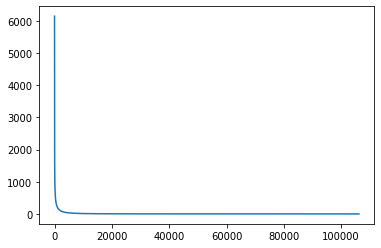

In [ ]:
count = [i[1] for i in c.most_common()]
plt.plot(count)

**ごく少数の単語が、高頻出...他の大部分は低頻出**  
つまり文章の中では、単語出現度合いに大きな隔たりがあるということがわかります。  
  
ほとんどの単語が1回しか出ていないよう文章が大半で、  
トピックモデルを用いる場合、1回や2回程度の低頻出な単語や、反対に、  
出現頻度が非常に高い単語はフィルタリングしてしまおうという前処理が一般的です。

In [ ]:
from gensim import corpora

In [ ]:
# 各文章ごとの、単語リストを辞書化する
dictionary = corpora.Dictionary(texts)
print(dictionary.token2id)

{'acts': 0, 'atrocities': 1, 'austria': 2, 'away': 3, 'biased': 4, 'blessing': 5, 'clearly': 6, 'commited': 7, 'daily': 8, 'degree': 9, 'described': 10, 'disagree': 11, 'europe': 12, 'europeans': 13, 'existance': 14, 'go': 15, 'got': 16, 'government': 17, 'guilt': 18, 'holocaust': 19, 'ignore': 20, 'im': 21, 'incidences': 22, 'inhuman': 23, 'israeli': 24, 'israels': 25, 'jews': 26, 'least': 27, 'letter': 28, 'lived': 29, 'look': 30, 'makes': 31, 'media': 32, 'might': 33, 'nad': 34, 'occured': 35, 'one': 36, 'power': 37, 'proisraeli': 38, 'races': 39, 'realize': 40, 'reason': 41, 'received': 42, 'rediculous': 43, 'report': 44, 'reports': 45, 'reputation': 46, 'ruin': 47, 'seem': 48, 'shame': 49, 'soldiers': 50, 'statement': 51, 'story': 52, 'subsidizing': 53, 'sure': 54, 'think': 55, 'treating': 56, 'try': 57, 'unfortunate': 58, 'us': 59, 'well': 60, 'whole': 61, 'world': 62, 'accept': 63, 'actually': 64, 'altatheisthard': 65, 'anyway': 66, 'atheism': 67, 'bake': 68, 'big': 69, 'bummin'

この状態では、まだ単語の頻出は考慮していないので、  
次に行うことは、同じくgensimを用いて...

In [ ]:
dictionary_temp = dictionary
### 高頻出なもの、低頻出なものは除外する
dictionary_temp.filter_extremes(no_below=3, no_above=0.1)

全体の0.1=10%よりも多く出現している単語も一緒に消してしまうのが、  
`no_above`  
文書数(ここでは３文書)`no_below`を指定することで、  
その文書数-1の文書数以下にしか現れない単語も除外されます。

In [ ]:
### 皮革のため、再度読み込み
dictionary = corpora.Dictionary(texts)

In [ ]:
len(dictionary), len(dictionary_temp)

(106194, 24971)

In [ ]:
### 前処理が終わったら、オリジナルのコーパス(辞書)を作成
original_corpus = [dictionary_temp.doc2bow(text) for text in texts]

In [ ]:
original_corpus[0][:100]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 2),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 4),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 2),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1)]

変換されたデータは、  
インデックスごと出現回数が文書の分だけ入ったタプル単位のリストになっています。

In [ ]:
### LDAを用いた、トピックモデル構築
lda = gensim.models.ldamodel.LdaModel(
    corpus=original_corpus,
    num_topics=20,
    id2word=dictionary_temp
)

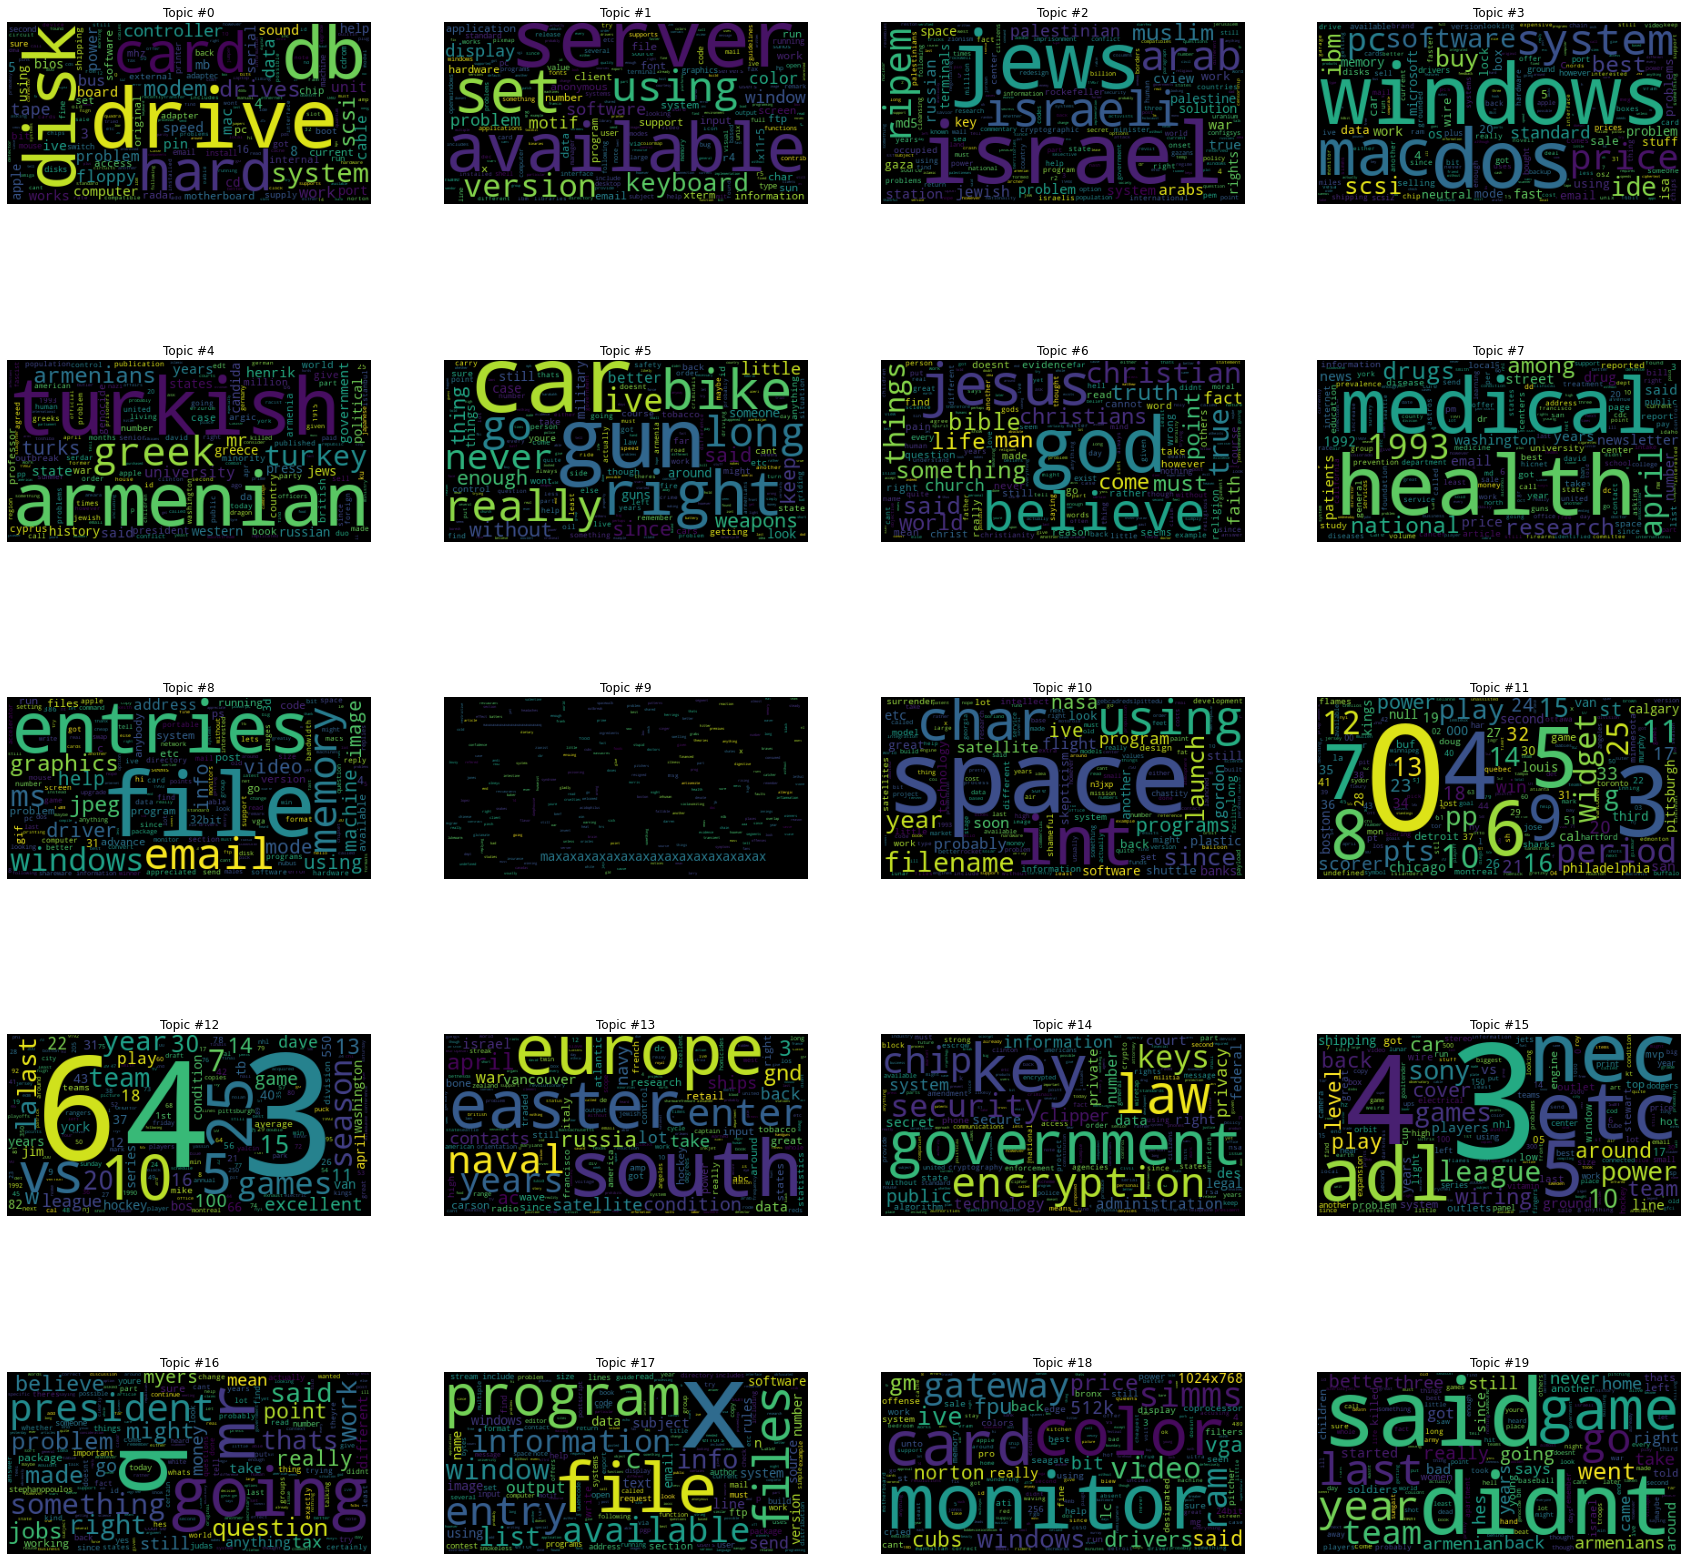

In [ ]:
plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = WordCloud().generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

## 前回の復習と、見直し
**上記の流れと同様に、前回何をやっていたかのおさらいをします。**

In [ ]:
import csv, glob

In [ ]:
DIR_PATH = '/content/drive/My Drive/NLP_TRAINING/DATA/'

In [ ]:
target_files = glob.glob(DIR_PATH+'Company/words_*')

In [ ]:
words_each_company = []
company_error = []
for file_path in target_files:

    target_file = file_path
    
    try:
        with open(target_file) as f:
            reader = csv.reader(f)
            words_by_company = [row[0] for row in reader]
            
        words_each_company.append(words_by_company)
    except:
        company_error.append(target_file[56:])

In [ ]:
company_error

['株式会社日本国際放送.txt',
 '株式会社地圏総合コンサルタント.txt',
 '株式会社ミールワークス.txt',
 '株式会社NJSコンサルタンツ.txt']

In [ ]:
words_each_company[0][:10]

['決算', '公表', 'IR', '新設', 'お知らせ', 'KB', 'ブリッジ', 'レポート', '投資', '向け']

In [ ]:
from gensim import corpora

In [ ]:
# 各企業ごとの、単語リスト
dictionary = corpora.Dictionary(words_each_company)
print(dictionary.token2id)

{'AI': 0, 'CEO': 1, 'COO': 2, 'Facebook': 3, 'Feedback': 4, 'Game': 5, 'Google': 6, 'IR': 7, 'IT': 8, 'JAPAN': 9, 'KB': 10, 'MB': 11, 'MRT': 12, 'Medical': 13, 'NY': 14, 'Net': 15, 'PDF': 16, 'SCUEL': 17, 'SEM': 18, 'SEO': 19, 'SNS': 20, 'TEL': 21, 'TOP': 22, 'Twitter': 23, 'URL': 24, 'WEB': 25, 'Web': 26, 'Yahoo': 27, 'bridge': 28, 'jp': 29, 'movie': 30, 'あく': 31, 'お客様': 32, 'お手伝い': 33, 'お知らせ': 34, 'どなた': 35, 'やりとり': 36, 'アイデア': 37, 'アイリス': 38, 'アカウント': 39, 'アサイン': 40, 'アップ': 41, 'アピール': 42, 'アプリ': 43, 'イベント': 44, 'イン': 45, 'インターネット': 46, 'インフラ': 47, 'エムエフパートナーズ': 48, 'エリア': 49, 'エンジニア': 50, 'エンジニアリング': 51, 'エンジン': 52, 'オフィス': 53, 'オプション': 54, 'オリジナルブログ': 55, 'カジュアル': 56, 'カタログ': 57, 'カレンダー': 58, 'ガイドデント': 59, 'キャリア': 60, 'クオリティ': 61, 'クライアント': 62, 'クリニック': 63, 'グループ': 64, 'コスト': 65, 'コンサルタント': 66, 'コンサルティング': 67, 'コンテンツ': 68, 'コンバージョン': 69, 'コンプライアンス': 70, 'コンベンション': 71, 'サプライ': 72, 'サプライヤー': 73, 'サポート': 74, 'サーバ': 75, 'サーバー': 76, 'サービス': 77, 'シェア': 78, 'システム': 79, 'スカウト': 80, 'スクエル'

In [ ]:
dictionary_temp = dictionary

In [ ]:
### 高頻出なもの、低頻出なものは除外する
dictionary_temp.filter_extremes(no_below=3, no_above=0.1)

In [ ]:
# 各企業ごとの、単語リスト
dictionary = corpora.Dictionary(words_each_company)

In [ ]:
### すべての企業に共通する、出現単語を洗い出す
print(len(dictionary_temp.token2id), len(dictionary.token2id))

12280 48790


In [ ]:
dictionary_temp.token2id

{'COO': 0,
 'Game': 1,
 'KB': 2,
 'MB': 3,
 'Medical': 4,
 'NY': 5,
 'Net': 6,
 'SEM': 7,
 'あく': 8,
 'どなた': 9,
 'アイリス': 10,
 'アサイン': 11,
 'カジュアル': 12,
 'カタログ': 13,
 'カレンダー': 14,
 'クリニック': 15,
 'コンバージョン': 16,
 'コンプライアンス': 17,
 'コンベンション': 18,
 'サプライ': 19,
 'サプライヤー': 20,
 'スクリーニング': 21,
 'スタディ': 22,
 'ステーク': 23,
 'ステートメント': 24,
 'テンプレート': 25,
 'デメリット': 26,
 'トロフィー': 27,
 'ドクター': 28,
 'ハリウッド': 29,
 'バナー': 30,
 'パック': 31,
 'パネル': 32,
 'ブック': 33,
 'ブリッジ': 34,
 'プラント': 35,
 'プレミアムブリッジサロン': 36,
 'ママ': 37,
 'メディカル': 38,
 'ラクラク': 39,
 'レポーティング': 40,
 '中立': 41,
 '付属': 42,
 '会計士': 43,
 '偶然': 44,
 '優待': 45,
 '公平': 46,
 '公正': 47,
 '公認': 48,
 '再開': 49,
 '切磋琢磨': 50,
 '前回': 51,
 '前身': 52,
 '助手': 53,
 '労働省': 54,
 '医学部': 55,
 '医師': 56,
 '医薬品': 57,
 '医院': 58,
 '千葉大学': 59,
 '単元': 60,
 '台数': 61,
 '司法': 62,
 '合格': 63,
 '名簿': 64,
 '器材': 65,
 '国家': 66,
 '国民': 67,
 '土地': 68,
 '執筆': 69,
 '奮闘': 70,
 '学会': 71,
 '学術': 72,
 '定休': 73,
 '客員': 74,
 '家屋': 75,
 '小規模': 76,
 '常勤': 77,
 '平川': 78,
 '平素': 79,
 '弁護士': 80,
 '御礼

In [ ]:
from gensim import matutils

In [ ]:
each_company_words2bow = dictionary_temp.doc2bow(words_each_company[0])

In [ ]:
### 辞書のなかにある、ユニークな単語ごとに、各企業の単語出現回数(整数)をベクトルとして表現する
all_dense = []
for i in words_each_company:
    each_company_words2bow = dictionary_temp.doc2bow(i)
    dense = list(matutils.corpus2dense([each_company_words2bow], num_terms=len(dictionary_temp)).T[0])
    all_dense.append(dense)

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [ ]:
import numpy as np

In [ ]:
np.array(all_dense).shape

(567, 12280)

In [ ]:
### 567社すべてに共通した単語があるかを確認する
np.array(all_dense).T[0] == 0

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [ ]:
any(np.array(all_dense).T[0] == 0)

True

In [ ]:
### すべての要素が、"False"であれば...
any(np.array([False, False, False, False, False]))

False

In [ ]:
common_word_flag = []
counter = 0
all_dense_T_array = np.array(all_dense).T
for array in all_dense_T_array:
  if any(array == 0):
    counter += 1
    pass
  else:
    common_word_flag.append(counter)
    counter += 1

In [ ]:
common_word_flag

[]

In [ ]:
### 567社すべてに共通する単語はなかったが...分布はどうだろうか？

In [ ]:
common_word_flag = []
all_dense_T_array = np.array(all_dense).T
for array in all_dense_T_array:
  counter = 0
  for ele in array:
    if ele != 0:
      counter += 1
    else:
      continue
  common_word_flag.append(counter)

In [ ]:
common_word_flag

[30,
 10,
 20,
 13,
 11,
 11,
 16,
 18,
 7,
 27,
 3,
 38,
 33,
 50,
 51,
 36,
 12,
 50,
 6,
 28,
 13,
 4,
 17,
 51,
 6,
 22,
 42,
 3,
 27,
 3,
 46,
 30,
 34,
 55,
 32,
 37,
 3,
 45,
 55,
 13,
 29,
 22,
 15,
 45,
 10,
 35,
 32,
 34,
 45,
 47,
 46,
 55,
 55,
 10,
 37,
 10,
 55,
 37,
 21,
 14,
 4,
 30,
 11,
 53,
 9,
 3,
 45,
 43,
 54,
 50,
 16,
 25,
 20,
 41,
 5,
 5,
 50,
 44,
 3,
 25,
 54,
 23,
 52,
 30,
 33,
 10,
 39,
 4,
 11,
 43,
 52,
 12,
 26,
 21,
 6,
 30,
 33,
 44,
 14,
 21,
 41,
 22,
 48,
 54,
 21,
 55,
 13,
 42,
 40,
 11,
 34,
 40,
 47,
 15,
 27,
 50,
 47,
 37,
 31,
 48,
 26,
 44,
 14,
 22,
 4,
 8,
 3,
 22,
 34,
 55,
 12,
 19,
 5,
 9,
 8,
 28,
 3,
 23,
 17,
 24,
 35,
 56,
 35,
 6,
 4,
 12,
 20,
 27,
 8,
 3,
 18,
 19,
 14,
 22,
 37,
 3,
 37,
 33,
 3,
 7,
 26,
 5,
 11,
 3,
 21,
 9,
 7,
 8,
 5,
 10,
 27,
 26,
 7,
 3,
 3,
 7,
 7,
 19,
 25,
 33,
 13,
 46,
 11,
 12,
 4,
 21,
 5,
 3,
 49,
 6,
 4,
 7,
 35,
 32,
 3,
 9,
 35,
 11,
 20,
 27,
 14,
 22,
 39,
 16,
 13,
 13,
 33,
 16,
 29,
 51,

In [ ]:
import pandas as pd 

In [ ]:
# 度数分布表を作る
def Frequency_Distribution(data, class_width):
  data = np.asarray(data)
  if class_width is None:
      class_size = int(np.log2(data.size).round()) + 1
      class_width = round((data.max() - data.min()) / class_size)

  bins = np.arange(0, data.max()+class_width+1, class_width)
  hist = np.histogram(data, bins)[0]
  cumsum = hist.cumsum()

  return pd.DataFrame({'階級値': (bins[1:] + bins[:-1]) / 2,
                       '度数': hist,
                       '累積度数': cumsum,
                       '相対度数': hist / cumsum[-1],
                       '累積相対度数': cumsum / cumsum[-1]},
                      index=pd.Index([f'{bins[i]}以上{bins[i+1]}未満'
                      for i in range(hist.size)],
                      name='階級'))

In [ ]:
Frequency_Distribution(common_word_flag, None)

階級値    度数   累積度数      相対度数    累積相対度数
階級                                             
0以上4未満     2.0  2828   2828  0.230293  0.230293
4以上8未満     6.0  4207   7035  0.342590  0.572883
8以上12未満   10.0  1709   8744  0.139169  0.712052
12以上16未満  14.0   899   9643  0.073208  0.785261
16以上20未満  18.0   574  10217  0.046743  0.832003
20以上24未満  22.0   445  10662  0.036238  0.868241
24以上28未満  26.0   364  11026  0.029642  0.897883
28以上32未満  30.0   267  11293  0.021743  0.919625
32以上36未満  34.0   244  11537  0.019870  0.939495
36以上40未満  38.0   182  11719  0.014821  0.954316
40以上44未満  42.0   171  11890  0.013925  0.968241
44以上48未満  46.0   134  12024  0.010912  0.979153
48以上52未満  50.0   124  12148  0.010098  0.989251
52以上56未満  54.0   111  12259  0.009039  0.998290
56以上60未満  58.0    21  12280  0.001710  1.000000

In [ ]:
import matplotlib.pyplot as plt

(array([2828., 4207., 1709.,  899.,  574.,  445.,  364.,  267.,  244.,
         182.,  171.,  134.,  124.,  111.,   21.]),
 array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60]),
 <a list of 15 Patch objects>)

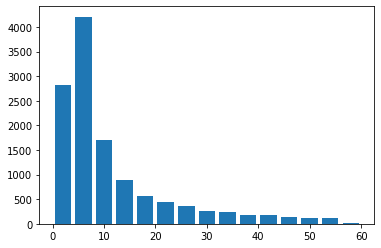

In [ ]:
plt.hist(common_word_flag, list(range(0, 64, 4)), rwidth=.8)

In [ ]:
import scipy.stats as st

In [ ]:
x_min, x_max = 0, 64

In [ ]:
d = 0.001

In [ ]:
n   = len(common_word_flag)         # 標本の大きさ 
mu  = np.mean(common_word_flag)       # 平均

In [ ]:
k = 4                   # 区間の幅

(array([2828., 4207., 1709.,  899.,  574.,  445.,  364.,  267.,  244.,
         182.,  171.,  134.,  124.,  111.,   21.]),
 array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60]),
 <a list of 15 Patch objects>)

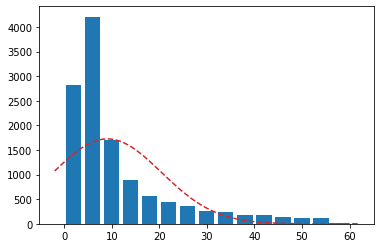

In [ ]:
# (3) 正規分布を仮定した近似曲線
sig = pd.Series(common_word_flag).std(ddof=1)  # 不偏標準偏差：ddof(自由度)=1
nx = np.linspace(x_min, x_max+d, 150) # 150分割
ny = st.norm.pdf(nx,mu,sig) * k * n
plt.plot( nx - k/2 , ny, color='tab:red', linewidth=1.5, linestyle='--')
plt.hist(common_word_flag, list(range(0, 64, 4)), rwidth=.8)

In [ ]:
### 重要そうな単語はどこにあるのだろうか...？
### 各企業に『よく出現する』単語の境界線は？

In [ ]:
words_for_data = []
words_for_nocareer = []
for key, value in dictionary_temp.token2id.items():
  if 'データ' in key:
    words_for_data.append(value)
  elif '未経験' in key:
    words_for_nocareer.append(value)
  else:
    continue

In [ ]:
words_for_nocareer

[1803]

In [ ]:
words_for_data

[773,
 1553,
 2561,
 2981,
 3096,
 3184,
 5218,
 5219,
 5717,
 5726,
 6665,
 9135,
 9573,
 9995,
 10248,
 10478,
 10671,
 10948,
 11748,
 11965,
 12215,
 12275]

In [ ]:
words_for_nocareer

[1803]

In [ ]:
dense_all_company_array = np.array(all_dense)

In [ ]:
trigger_each_company_nocareer = []
company_num_nocareer = []
counter = 0
for array in dense_all_company_array:
  trigger = []
  for num, count in zip(array, range(len(array))):
      for flag in words_for_nocareer:
        if count == flag:
          trigger.append(num)
        else:
          continue
  if all(np.array(trigger)==0):
    counter += 1
    pass
  else:
    trigger_each_company_nocareer.append(trigger)
    company_num_nocareer.append(counter)
    counter += 1

In [ ]:
company_num_nocareer

[8,
 17,
 28,
 34,
 40,
 53,
 60,
 80,
 83,
 159,
 163,
 176,
 179,
 185,
 208,
 212,
 213,
 216,
 236,
 239,
 295,
 297,
 310,
 319,
 323,
 324,
 326,
 344,
 357,
 378,
 381,
 391,
 394,
 397,
 432,
 445,
 446,
 463,
 471,
 478,
 511,
 514,
 515,
 533,
 537,
 540]

In [ ]:
trigger_each_company = []
company_num = []
counter = 0
for array in dense_all_company_array:
  trigger = []
  for num, count in zip(array, range(len(array))):
      for flag in words_for_data:
        if count == flag:
          trigger.append(num)
        else:
          continue
  if all(np.array(trigger)==0):
    counter += 1
    pass
  else:
    trigger_each_company.append(trigger)
    company_num.append(counter)
    counter += 1

In [ ]:
len(trigger_each_company), len(company_num)

(124, 124)

In [ ]:
trigger_each_company[0]

[2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
for key, value in dictionary_temp.token2id.items():
  for num in words_for_data:
    if value == num:
      print(key)

データドリブン
ビックデータ
データソリューション
データバンク
データエービック
データアナリティクス
データクレンジング
データリテラシー
カスタマーデータプラットフォーム
データマネジメントプラットフォーム
データ通信
ＮＴＴデータ
ゼンリンデータコム
帝国データバンク
データキュビット
データドリブンマーケティング
データベースシステム
データー
データレイク
データイントラマート
データウェアハウス
データセンターソリューション


In [ ]:
company_relate_data = []
for i, j in zip(trigger_each_company, company_num):
  company_relate_data.append([j, sum(i)])

In [ ]:
company_relate_nocareer = []
for i, j in zip(trigger_each_company_nocareer, company_num_nocareer):
  company_relate_nocareer.append([j, sum(i)])

In [ ]:
company_relate_data

[[3, 2.0],
 [7, 2.0],
 [12, 1.0],
 [15, 2.0],
 [16, 1.0],
 [17, 1.0],
 [24, 2.0],
 [36, 4.0],
 [43, 3.0],
 [46, 1.0],
 [47, 1.0],
 [55, 3.0],
 [61, 1.0],
 [65, 1.0],
 [93, 2.0],
 [104, 2.0],
 [109, 1.0],
 [113, 2.0],
 [115, 2.0],
 [116, 1.0],
 [119, 1.0],
 [124, 7.0],
 [134, 1.0],
 [137, 2.0],
 [138, 1.0],
 [139, 1.0],
 [140, 1.0],
 [144, 1.0],
 [145, 1.0],
 [151, 4.0],
 [154, 1.0],
 [156, 1.0],
 [158, 3.0],
 [166, 1.0],
 [167, 1.0],
 [168, 2.0],
 [169, 2.0],
 [172, 1.0],
 [181, 1.0],
 [182, 4.0],
 [190, 2.0],
 [191, 3.0],
 [194, 2.0],
 [195, 1.0],
 [206, 1.0],
 [208, 2.0],
 [212, 1.0],
 [221, 1.0],
 [224, 1.0],
 [226, 6.0],
 [229, 1.0],
 [233, 4.0],
 [237, 2.0],
 [243, 8.0],
 [247, 1.0],
 [250, 1.0],
 [256, 1.0],
 [262, 1.0],
 [265, 1.0],
 [273, 1.0],
 [275, 1.0],
 [290, 2.0],
 [295, 1.0],
 [296, 2.0],
 [300, 1.0],
 [303, 1.0],
 [311, 1.0],
 [324, 1.0],
 [328, 2.0],
 [329, 2.0],
 [335, 2.0],
 [336, 1.0],
 [339, 2.0],
 [348, 1.0],
 [359, 4.0],
 [374, 1.0],
 [394, 1.0],
 [396, 1.0],
 [4

In [ ]:
name_each_company = []
company_error = []
words_each_company = []
for file_path in target_files:

    target_file = file_path
    
    try:
        with open(target_file) as f:
            reader = csv.reader(f)
            words_by_company = [row[0] for row in reader]
            
        words_each_company.append(words_by_company)
        name_each_company.append(target_file[56:])

    except:
        company_error.append(target_file[56:])

In [ ]:
remake_company_relate_data = []
for i, j in zip(name_each_company,range(len(name_each_company))):
  for k in company_relate_data:
    if k[0] == j:
      remake_company_relate_data.append([i,k[1]])

In [ ]:
remake_company_relate_nocareer = []
for i, j in zip(name_each_company,range(len(name_each_company))):
  for k in company_relate_nocareer:
    if k[0] == j:
      remake_company_relate_nocareer.append([i,k[1]])

In [ ]:
remake_company_relate_nocareer

[['株式会社グローバルネット.txt', 2.0],
 ['株式会社アライズ.txt', 1.0],
 ['株式会社ワイズ・パートナーズ.txt', 1.0],
 ['株式会社NextNInja.txt', 1.0],
 ['株式会社インディペンデントインキュベータ.txt', 2.0],
 ['株式会社ヒッツカンパニー.txt', 1.0],
 ['株式会社中央クリエイト.txt', 1.0],
 ['JTA株式会社.txt', 3.0],
 ['株式会社オープン・システム・ソリューションズ.txt', 4.0],
 ['株式会社ビジネス・インフォメーション・テクノロジー.txt', 2.0],
 ['コムウェア株式会社.txt', 1.0],
 ['株式会社ベストメディカルライフ.txt', 3.0],
 ['株式会社ジェネレーションパス.txt', 5.0],
 ['ヒューマンタッチ株式会社.txt', 1.0],
 ['アクサス株式会社.txt', 3.0],
 ['株式会社グラスト.txt', 1.0],
 ['株式会社リビングコーポレーション.txt', 2.0],
 ['株式会社マグスタイル.txt', 1.0],
 ['NITOH株式会社.txt', 1.0],
 ['株式会社シーラ.txt', 1.0],
 ['株式会社サンデックス.txt', 1.0],
 ['株式会社a2media.txt', 1.0],
 ['株式会社ファミリーコーポレーション.txt', 1.0],
 ['株式会社ニジボックス.txt', 1.0],
 ['ForeVision株式会社.txt', 1.0],
 ['株式会社協栄情報.txt', 3.0],
 ['株式会社板前寿司ジャパン.txt', 1.0],
 ['ジャパンケーブルキャスト株式会社.txt', 1.0],
 ['株式会社クリーブ.txt', 1.0],
 ['株式会社ヒューマネージ.txt', 1.0],
 ['株式会社イー・ステート・オンライン.txt', 3.0],
 ['エコー・ジャパン株式会社.txt', 1.0],
 ['株式会社ポルテック.txt', 2.0],
 ['株式会社テクノエージェント.txt', 1.

In [ ]:
remake_company_relate_data

[['株式会社日経ビーピーコンサルティング.txt', 2.0],
 ['シエンプレ株式会社.txt', 2.0],
 ['株式会社リアリット.txt', 1.0],
 ['株式会社YAMAGIWA.txt', 2.0],
 ['ブロードマインド株式会社.txt', 1.0],
 ['株式会社アライズ.txt', 1.0],
 ['株式会社ココト.txt', 2.0],
 ['株式会社Agoop.txt', 4.0],
 ['株式会社エム・シー・アイ.txt', 3.0],
 ['株式会社ネクス・ソリューションズ.txt', 1.0],
 ['マークラインズ株式会社.txt', 1.0],
 ['株式会社ニコン・トリンブル.txt', 3.0],
 ['株式会社ビック酒販.txt', 1.0],
 ['株式会社AMAZONLATERNA.txt', 1.0],
 ['株式会社LinkBItConsulting.txt', 2.0],
 ['ペガトロン・ジャパン株式会社.txt', 2.0],
 ['株式会社東東京イエローハット.txt', 1.0],
 ['株式会社パネット.txt', 2.0],
 ['ENEOSリテーリング株式会社.txt', 2.0],
 ['株式会社ファイズホールディングス.txt', 1.0],
 ['株式会社パワーエッジ.txt', 1.0],
 ['株式会社エヌ・ティ・ティ・データ・ユニバーシティ.txt', 7.0],
 ['MBPジャパン株式会社.txt', 1.0],
 ['株式会社アジアンリンク.txt', 2.0],
 ['ハイアス・アンド・カンパニー株式会社.txt', 1.0],
 ['株式会社ファミリーネット・ジャパン.txt', 1.0],
 ['株式会社フォー・クオリア.txt', 1.0],
 ['日本ファシリティ・ソリューション株式会社.txt', 1.0],
 ['株式会社CGシステムズ.txt', 1.0],
 ['IZUMIコミュニケーションサービス株式会社.txt', 4.0],
 ['JLLモールマネジメント株式会社.txt', 1.0],
 ['株式会社ニッピ・フジタ.txt', 1.0],
 ['ビットクロス株式会社.txt

In [ ]:
data_related_company = sorted(remake_company_relate_data, key=lambda x: x[1], reverse=True)

In [ ]:
nocareer_related_company = sorted(remake_company_relate_nocareer, key=lambda x: x[1], reverse=True)

In [ ]:
with open('/content/drive/My Drive/NLP_TRAINING/data_related_company_202106.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(data_related_company)

In [ ]:
with open('/content/drive/My Drive/NLP_TRAINING/nocareer_related_company_202106.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(nocareer_related_company)